In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [ ]:
train_original = train.copy
test_original = test.copy

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

**object** - object format means variables are categorical. categorical variables in our dataset are:
'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area'

**int64** - ApplicantIncome        

**float64**-LoanAmount ,CoapplicantIncome,Loan_Amount_Term               

In [6]:
train.shape,test.shape

((614, 13), (367, 12))

In [7]:
for i in train.columns:
    print(i)

Loan_ID
Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


### univariate analysis

In [8]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
#print proportion
train.Loan_Status.value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

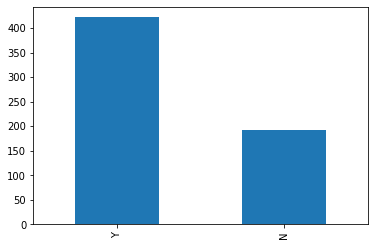

In [10]:
train.Loan_Status.value_counts().plot.bar()
plt.show()

The loan of 422 (around 69%) people out of 614 was approved.

lets visualize the categorical and ordinal features first

### independent variable(categorical)

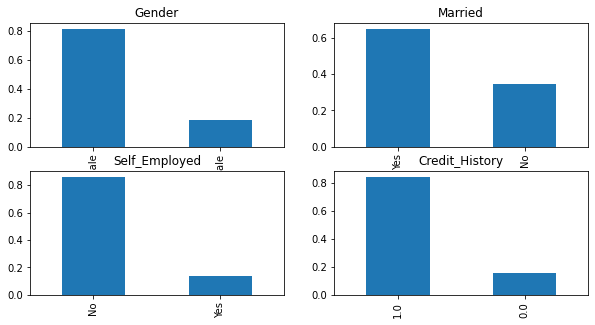

In [11]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(10,5),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

it can inferred from the above bar plots that:
    
80% applicants in the dataset are male.
65% applicants in the dataset are married.
15% applicants in the dataset are self employed.
85% applicants in the dataset are debts.


### independent variable(ordinal)


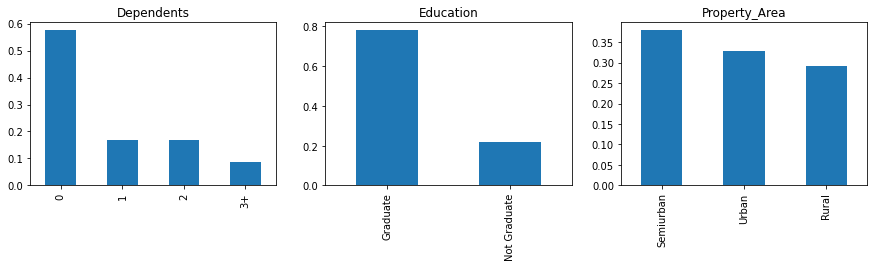

In [12]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(15,3),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

1. Most of the applicat dont have dependents.
2. 80% applicant are graduate
3. most of the applicants are from semiurban area

### independent varaiable numerical

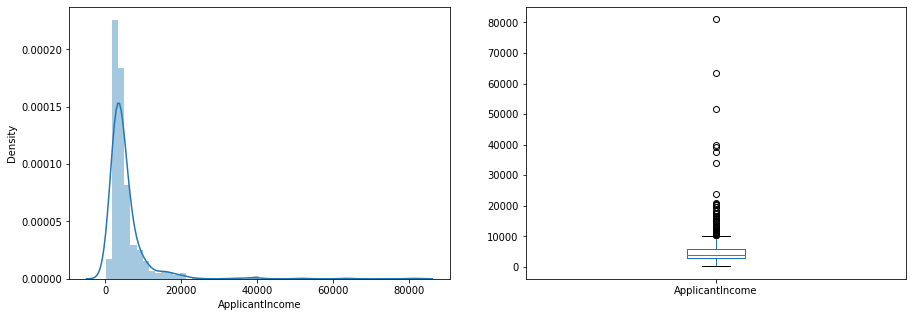

In [13]:
#lets look at the distribution of aplicant income first
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(15,5))
plt.show()

1. distribution of applicantincome is towards left which means it is not normally distributes. so will try to make it normal in later sectio as algorithms works better if the data is normally distributed.
2.  the boxplot confirms the  presence of a lot of outliers values. this can be attributed to income  disparity in the society. part of this can  be driven  by the fact we are looking at people  with differnt education levels. let us segregate them by education 

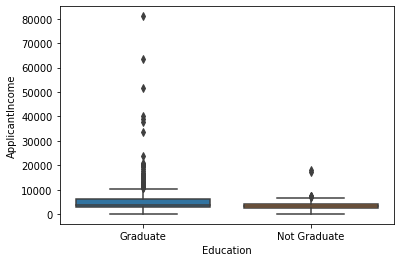

In [14]:
sns.boxplot(train['Education'],train['ApplicantIncome'])
plt.show()

we can see that there are higher number of graduated with high incomes,which are appearing to be the outliers

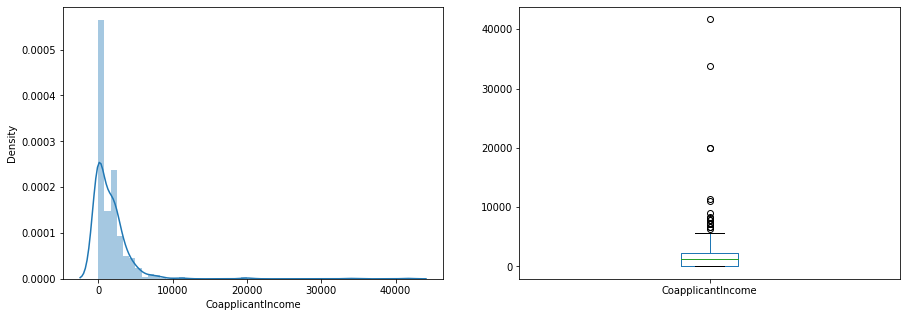

In [15]:
#coapplicant income distribution
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(15,5))
plt.show()

we see a similar distribution as that of the applicant income.Majority of coapplicants income ranges 0 to  5000. we also see a lot of outliers  in the coapplicant income and it is not normally distributed. 

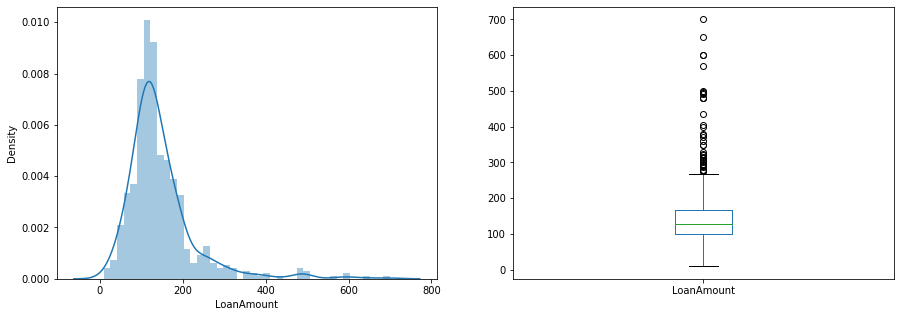

In [16]:
#distribution of loan amount variable
#coapplicant income distribution
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(train['LoanAmount'])
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(15,5))
plt.show()

we can see a lot of outliers in this variable and distribution is fairly normal. we will treat hte outlier in later section.

### bivariate analysis

we will now explore them again wrt the target variables

###  categorical independent vs Target variable

will will find the relation between taget and categorical independent variables

lets look at the stacked bar plot now which will give us the proportion of approved and unapproved loans

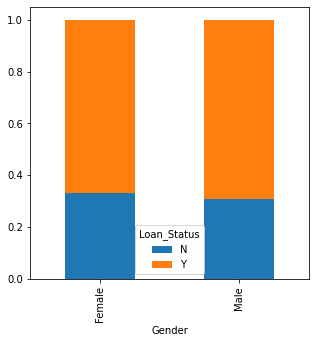

In [17]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

proportion of male and female applicant is more or less same for both approved and non approved loans

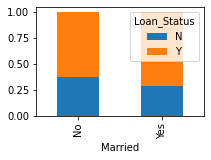

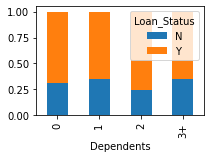

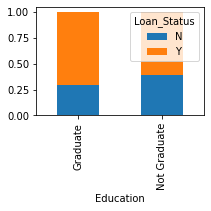

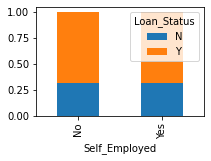

In [18]:
#remaining categorical variables vs target variable
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(3,2))
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(3,2))
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(3,2))
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(3,2))
plt.show()

1. proprtion of marrried applicants is higher for the approved loans.
2. Distibuion of applicants with 1 or 3+ dependents is similar across both the categories of loan_status.
3. there is nothing significant we can infer from self employed vs loan status plot

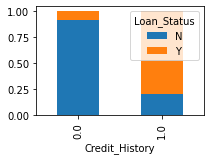

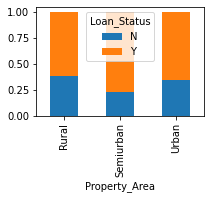

In [19]:
#relationship between remaining categorical independents variables and loan status

Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(3,2))
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(3,2))
plt.show()

1. it seems people with credit history as 1 are more likely to get their loans approved.
2. proportion of loan getting approved in semiurban area is higher as compared to that in rural or urban areas.

### Numerical independent variable vs target variable 

we will try to find the mean income of people for which the loan has been approved vs the mean income people for which the loan has been approved

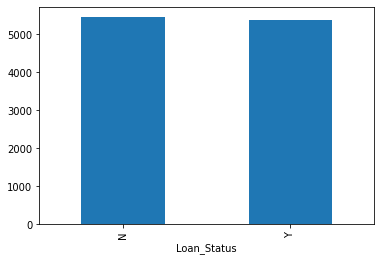

In [20]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

here the y axis represents the mean applicant income. we dont see any change in the mean income. so lets make bins for applicant income varibale based on the values in it and analyse  the corresponding loan status for each bin

Text(0, 0.5, 'Percentage')

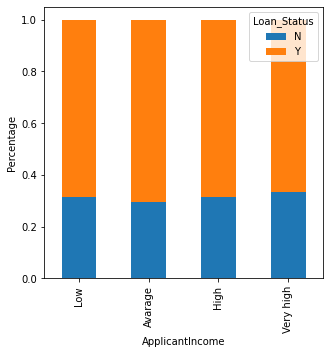

In [21]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Avarage','High','Very high']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

it can be inferred that applicantincome does not affect the chances of loan approval which contradicts our hypothesis in which we  assumed that if the applicant income is high the chances of approval will also be high

Text(0, 0.5, 'Percentage')

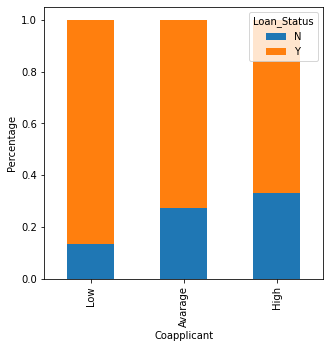

In [22]:
#analyze the coapplicant income
bins = [0,1000,3000,42000]
group = ['Low','Avarage','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.xlabel('Coapplicant')
plt.ylabel('Percentage')

it shows that if coapplicant income less the chances of loan approval are high. but this does not look right. the possible reason behind this may be that the most of applicant dont have any coapplicant so the coapplicant income for such applicant is 0 and hence the loan approval is not dependent on it.so we can make  a new variable in which we will combine the applicants and coapplicant income to visualize the combined effect of income on loan approval

In [23]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin'],
      dtype='object')

Text(0, 0.5, 'Percentage')

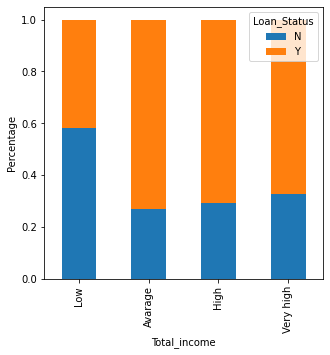

In [24]:
#combined the applicant and coapplicant income and see the total income on loan status

train['Total_income'] = train['ApplicantIncome']+train['CoapplicantIncome']
bins = [0,2500,4000,6000,81000]
group = ['Low','Avarage','High','Very high']
train['Total_income_bin'] = pd.cut(train['Total_income'],bins,labels=group)
Total_income_bin = pd.crosstab(train['Total_income_bin'],train['Loan_Status'])
Total_income_bin.div(Total_income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.xlabel('Total_income')
plt.ylabel('Percentage')

we can see that the proportion of loan getting approved for applicants having low total income is very less as ompared to that applicant with avg, high ,very high income

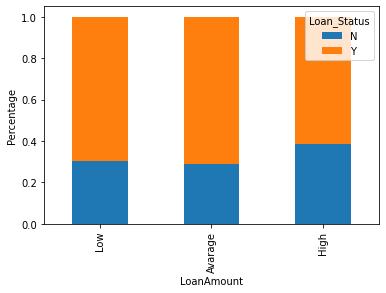

In [25]:
#visualize the loan amount
bins = [0,100,200,700]
group = ['Low','Avarage','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

it can be seen proportion of approved loans is higher for low and avg loan amount as compared to that of high loan amount which supports our hypothesis in which  we considerd that the chances of loan approval will be high when the loan amount is less.

In [26]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin', 'Total_income',
       'Total_income_bin', 'LoanAmount_bin'],
      dtype='object')

In [27]:
train = train.drop(['Income_bin', 'Coapplicant_Income_bin', 'Total_income','Total_income_bin', 'LoanAmount_bin'],axis=1)

In [28]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

In [29]:
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

In [30]:
train['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

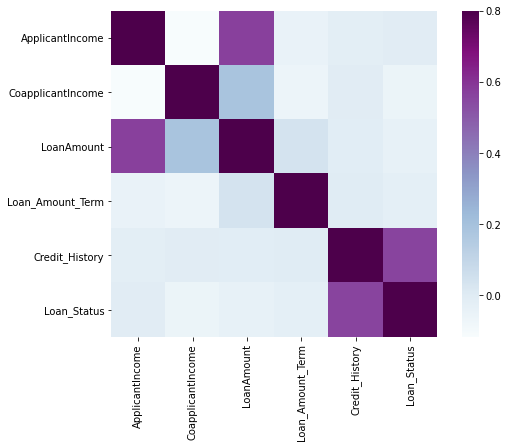

In [31]:
matrix = train.corr()
f,ax =plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap='BuPu')

we see that the most correlated variables are
(ApplicantIncome-LoanAmount),
(Credit_History-Loan_Status),
(LoanAmount-)CoapplicantIncome)


###  missing value imputation

In [32]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

1. for numerical --imputing mean or median
2. for categorical-- mode

In [33]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [34]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

the val of 360 is repeating the most.


In [35]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [36]:
#we will see the the loan amount variable. as it is a 
# numerical variable, we can use mean or median to impute 
# missing values. we will use median bez loan amount have outliers

In [38]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [39]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [40]:
#lets fill missing val in test dataset
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

### outlier treatment

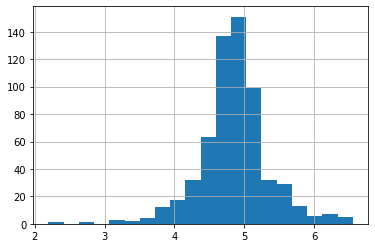

In [41]:
#remove skewness is by doing the log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

now the distribution looks much closer to nrmal and effect of extreme values has been significantly subsided. lets build a logistic regression model and make predictions for the test dataset

### Model Building

In [42]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [43]:
X = train.drop('Loan_Status',1)
y = train['Loan_Status']

In [44]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,4.852030
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,4.852030
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,4.189655
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,4.787492
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,4.948760


In [45]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [50]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [51]:
pred_test = model.predict(x_test)

In [52]:
accuracy_score(y_test,pred_test)

0.7945945945945946

predictions are almost 80% accurate, ie 80% of the loan_status correctly

In [54]:
#prediction for test  data
pred_test_data = model.predict(test)

In [58]:
from sklearn.model_selection import StratifiedKFold

In [59]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [63]:
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy score:',score)
    i+=1
    pred_test_data = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]       


1 of kfold 5
Accuracy score: 0.8048780487804879

2 of kfold 5
Accuracy score: 0.8373983739837398

3 of kfold 5
Accuracy score: 0.7804878048780488

4 of kfold 5
Accuracy score: 0.7886178861788617

5 of kfold 5
Accuracy score: 0.7950819672131147


### Feature Engineering

In [66]:
train['Total_income'] = train['ApplicantIncome']+train['CoapplicantIncome']

In [67]:
test['Total_income'] = test['ApplicantIncome']+test['CoapplicantIncome']

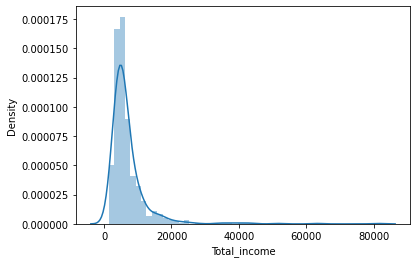

In [69]:
#distribution of total income
sns.distplot(train['Total_income'])
plt.show()

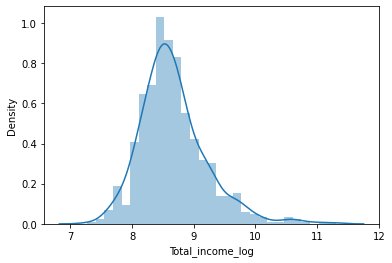

In [72]:
#right skewd so use log transformation
train['Total_income_log']=np.log(train['Total_income'])
sns.distplot(train['Total_income_log'])
plt.show()

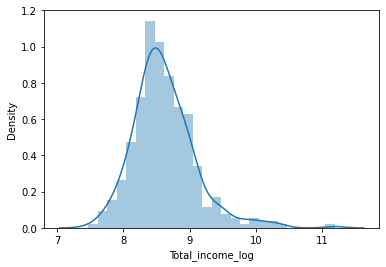

In [73]:
test['Total_income_log']=np.log(test['Total_income'])
sns.distplot(test['Total_income_log'])
plt.show()

now the distribution looks much closer to noraml distribution

In [75]:
#lets create emi feature
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

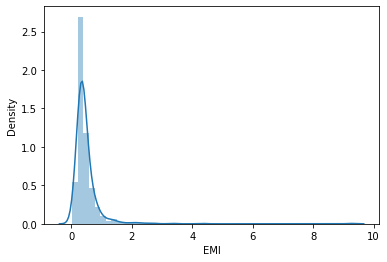

In [76]:
#distribution of emi
sns.distplot(train['EMI'])
plt.show()

In [77]:
#create balance feature
train['Balance_income'] =train['Total_income']-(train['EMI']*1000)
test['Balance_income'] =test['Total_income']-(test['EMI']*1000)


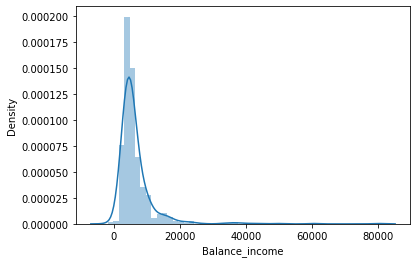

In [78]:
#distribution of Balance_income
sns.distplot(train['Balance_income'])
plt.show()

lets drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high. and logistic regression asumes that the variables are not highly correlated.  so removing correlated features will help in reducing the noise too.

In [79]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_3', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Total_income', 'Total_income_log', 'EMI',
       'Balance_income'],
      dtype='object')

In [80]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],axis=1)

In [81]:
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],axis=1)

In [82]:
X = train.drop('Loan_Status',1)
y = train['Loan_Status']

### Logistic Regression

In [83]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [84]:
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy score:',score)
    i+=1
    pred_test_data = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]       


1 of kfold 5
Accuracy score: 0.7886178861788617

2 of kfold 5
Accuracy score: 0.6910569105691057

3 of kfold 5
Accuracy score: 0.6666666666666666

4 of kfold 5
Accuracy score: 0.7804878048780488

5 of kfold 5
Accuracy score: 0.680327868852459


### Decision  tree

In [88]:
from sklearn import tree

In [89]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)

In [90]:
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy score:',score)
    i+=1
    pred_test_data = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]       


1 of kfold 5
Accuracy score: 0.7398373983739838

2 of kfold 5
Accuracy score: 0.6991869918699187

3 of kfold 5
Accuracy score: 0.7560975609756098

4 of kfold 5
Accuracy score: 0.7073170731707317

5 of kfold 5
Accuracy score: 0.6721311475409836


### Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy score:',score)
    i+=1
    pred_test_data = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]       


6 of kfold 5
Accuracy score: 0.8292682926829268

7 of kfold 5
Accuracy score: 0.7886178861788617

8 of kfold 5
Accuracy score: 0.8048780487804879

9 of kfold 5
Accuracy score: 0.8048780487804879

10 of kfold 5
Accuracy score: 0.7540983606557377


### Grid search cv

In [96]:
param = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
grid = GridSearchCV(RandomForestClassifier(random_state=1),param)

In [99]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [101]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [102]:
grid.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [103]:
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1,max_depth=5, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy score:',score)
    i+=1
    pred_test_data = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]       


11 of kfold 5
Accuracy score: 0.8211382113821138

12 of kfold 5
Accuracy score: 0.8373983739837398

13 of kfold 5
Accuracy score: 0.7804878048780488

14 of kfold 5
Accuracy score: 0.7804878048780488

15 of kfold 5
Accuracy score: 0.7868852459016393


In [105]:
importance = pd.Series(model.feature_importances_, index=X.columns)

<AxesSubplot:>

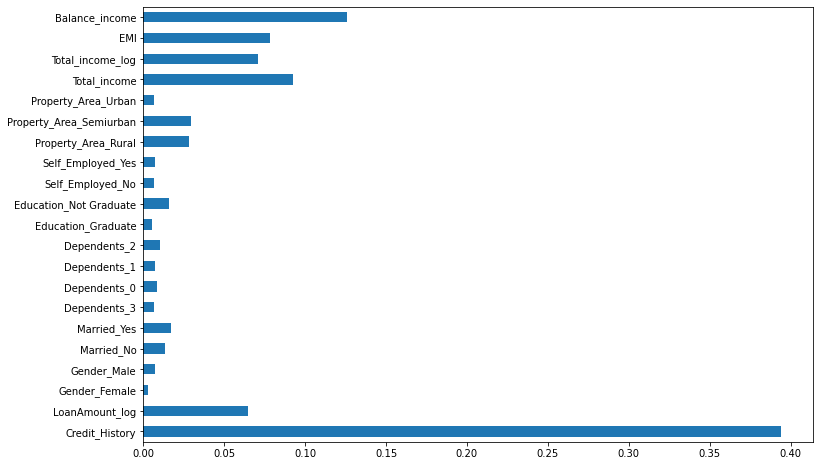

In [107]:
importance.plot(kind='barh',figsize=(12,8))

### Xgboost

In [110]:
from xgboost import XGBClassifier

In [111]:
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1,max_depth=5, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('Accuracy score:',score)
    i+=1
    pred_test_data = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]       


16 of kfold 5
Accuracy score: 0.8211382113821138

17 of kfold 5
Accuracy score: 0.8373983739837398

18 of kfold 5
Accuracy score: 0.7804878048780488

19 of kfold 5
Accuracy score: 0.7804878048780488

20 of kfold 5
Accuracy score: 0.7868852459016393


In [114]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
ypred=logreg.predict(x_test)
accuracy_score(y_test,ypred)

0.7567567567567568

In [115]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier

In [116]:
classifiers = [LogisticRegression(random_state = 0),KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB()]


In [117]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
Basic = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(x_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    Basic = Basic.append(log_entry)
    
print("="*30)

LogisticRegression
****Results****
Accuracy: 75.6757%
Log Loss: 0.5238615499266408
KNeighborsClassifier
****Results****
Accuracy: 62.7027%
Log Loss: 1.525682379927986
DecisionTreeClassifier
****Results****
Accuracy: 67.5676%
Log Loss: 11.20176531726833
RandomForestClassifier
****Results****
Accuracy: 74.5946%
Log Loss: 0.5062654025235684
XGBClassifier
****Results****
Accuracy: 75.6757%
Log Loss: 0.6860190603624072
AdaBoostClassifier
****Results****
Accuracy: 76.7568%
Log Loss: 0.681873744760631
GradientBoostingClassifier
****Results****
Accuracy: 76.2162%
Log Loss: 0.5486393238989775
GaussianNB
****Results****
Accuracy: 78.3784%
Log Loss: 0.7415847425473221


In [119]:
Basic

,Classifier,Accuracy,Log Loss
0,LogisticRegression,75.675676,0.523862
0,KNeighborsClassifier,62.702703,1.525682
0,DecisionTreeClassifier,67.567568,11.201765
0,RandomForestClassifier,74.594595,0.506265
0,XGBClassifier,75.675676,0.686019
0,AdaBoostClassifier,76.756757,0.681874
0,GradientBoostingClassifier,76.216216,0.548639
0,GaussianNB,78.378378,0.741585


In [120]:
results1=pd.DataFrame(Basic.sort_values(by='Accuracy',ascending=False).reset_index())
results1=results1.drop('index',axis=1)
results1.sort_values(by='Accuracy',ascending=True)

,Classifier,Accuracy,Log Loss
7,KNeighborsClassifier,62.702703,1.525682
6,DecisionTreeClassifier,67.567568,11.201765
5,RandomForestClassifier,74.594595,0.506265
3,LogisticRegression,75.675676,0.523862
4,XGBClassifier,75.675676,0.686019
2,GradientBoostingClassifier,76.216216,0.548639
1,AdaBoostClassifier,76.756757,0.681874
0,GaussianNB,78.378378,0.741585


In [128]:
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(x_train, y_train)
ypred = model.predict(x_test)
evaluation = f1_score(y_test, ypred)
evaluation

0.8621908127208482

In [130]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
ypred = model.predict(x_test)
evaluation = f1_score(y_test, ypred)
evaluation

0.8339483394833948